<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/Human_Action_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries:

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 1.3 MB/s 


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import os
import time
import matplotlib.pyplot as plt

# keypoints using mediapipe holistic:

In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image,model):
  results = model.process(image)
  return image, results

In [ ]:
def draw_landmarks(img,results):
  mp_drawing.draw_landmarks(img, 
                            results.face_landmarks,
                            mp_holistic.FACEMESH_TESSELATION,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            mp_holistic.POSE_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.right_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 200, 55), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.left_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 55, 200), thickness=1, circle_radius=1))

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
      ret, frame = cap.read()
      # recolor feed
      
      # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      # make detections
      frame, results = mediapipe_detection(frame,holistic)
      # print(results.face_landmarks)  
    
      # recoloring image back to BGR for rendering
      # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      
      #face detetction
      draw_landmarks(frame,results)
      
      cv2.imshow('Webcam Feed', frame)

      if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

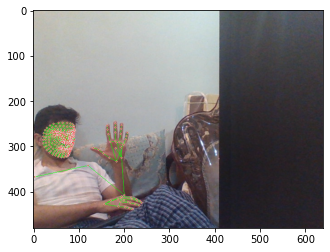

In [ ]:
plt.imshow(img)

In [ ]:
results.left_hand_landmarks

landmark {
  x: 0.26889505982398987
  y: 0.4249219298362732
  z: 3.275498627886009e-08
}
landmark {
  x: 0.2638658881187439
  y: 0.3960406482219696
  z: 0.005008023697882891
}
landmark {
  x: 0.25938960909843445
  y: 0.36377376317977905
  z: 0.0013473930303007364
}
landmark {
  x: 0.2599776089191437
  y: 0.34285444021224976
  z: -0.004755089059472084
}
landmark {
  x: 0.27051302790641785
  y: 0.3289354145526886
  z: -0.011108236387372017
}
landmark {
  x: 0.2569149434566498
  y: 0.3370426297187805
  z: -0.011673074215650558
}
landmark {
  x: 0.24332277476787567
  y: 0.2938441336154938
  z: -0.02031225897371769
}
landmark {
  x: 0.23814129829406738
  y: 0.272350013256073
  z: -0.023808810859918594
}
landmark {
  x: 0.2344720959663391
  y: 0.2555399537086487
  z: -0.026306068524718285
}
landmark {
  x: 0.25246480107307434
  y: 0.34820181131362915
  z: -0.019199654459953308
}
landmark {
  x: 0.21773751080036163
  y: 0.3228698670864105
  z: -0.02990197204053402
}
landmark {
  x: 0.20172347